In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
days = np.arange(1, 31, 2)
days

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [4]:
w = 2.5
b = 50

In [5]:
kgs = b + (w * days)
noise = np.random.randn(len(kgs)) * 0.8
kgs += noise
kgs

array([ 51.97869134,  57.18975647,  61.46831947,  68.32183496,
        72.66918084,  77.60341805,  82.917265  ,  86.19731498,
        92.53987921,  98.00058936, 103.25564021, 107.59369259,
       112.43331848, 116.19034989, 122.93450173])

In [6]:
len(kgs)

15

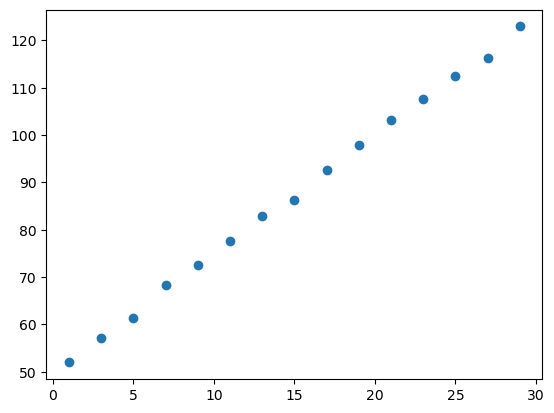

In [7]:
plt.scatter(days, kgs)

In [8]:
# [1, 2, 3, 4] * 10

In [9]:
w = 0.5
b = 50
# h = w*x + b
def cal_h(x):
    h = w * x + b
    return h

cal_h(0)
# h

50.0

In [10]:
cal_h(10)

55.0

In [11]:
cal_h(20)

60.0

In [12]:
cal_h(30)

65.0

In [13]:
# h = 50 + 0.5*x

In [14]:
35**2

1225

In [15]:
kgs

array([ 51.97869134,  57.18975647,  61.46831947,  68.32183496,
        72.66918084,  77.60341805,  82.917265  ,  86.19731498,
        92.53987921,  98.00058936, 103.25564021, 107.59369259,
       112.43331848, 116.19034989, 122.93450173])

In [16]:
w = 3
h = kgs_from_predict = (w * days) + b
h

array([ 53,  59,  65,  71,  77,  83,  89,  95, 101, 107, 113, 119, 125,
       131, 137])

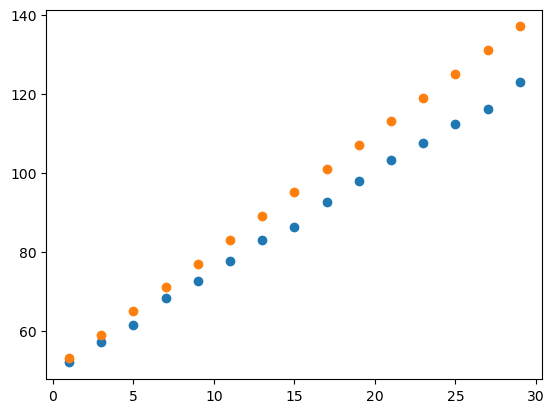

In [17]:
plt.scatter(days, kgs)
plt.scatter(days, kgs_from_predict)

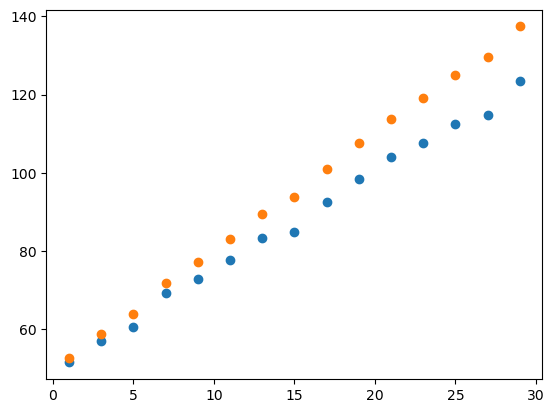

In [18]:
plt.scatter(days, kgs + noise)
plt.scatter(days, kgs_from_predict + noise)

In [19]:
sse = ((kgs - kgs_from_predict) ** 2 ).sum()
sse

1139.036302860954

In [20]:
from mpl_toolkits.mplot3d import Axes3D

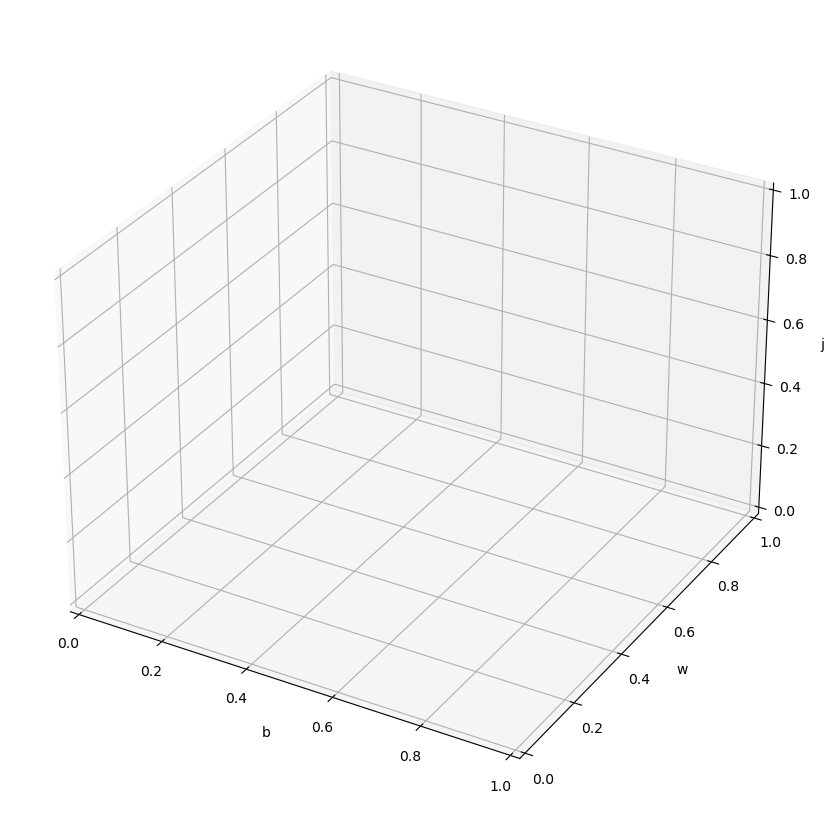

In [21]:
plt.figure(figsize=[8,8])
ax = plt.axes([0,0,1,1], projection='3d', 
             xlabel='b', ylabel='w', zlabel='j')

plt.show()

In [22]:
# np.arange(1, 31, 10)
# np.linspace(1, 31, 10)

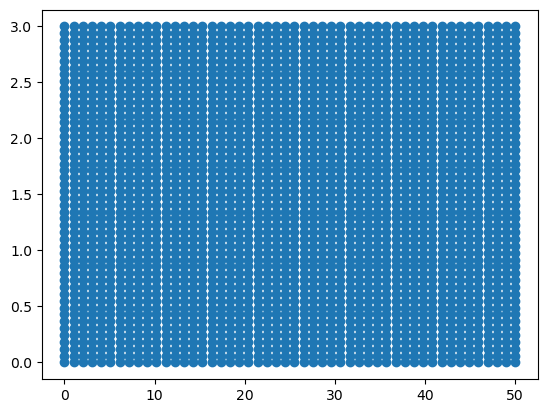

In [23]:
mb, mw = np.meshgrid(
    np.linspace(0, b), np.linspace(0, w),
)
plt.scatter(mb, mw)

In [24]:
sse = ((days*mw.ravel()[:,None]+mb.ravel()[:,None]-kgs)**2).sum(1).reshape(50,-1)
sse


array([[121687.24521838, 119026.75401152, 116397.49978926, ...,
         30411.33883764,  29218.98590651,  28057.86995996],
       [118951.56723038, 116319.18930965, 113718.04837352, ...,
         28996.98529779,  27832.74565278,  26699.74299236],
       [116249.58770135, 113645.32306675, 111072.29541675, ...,
         27616.33021691,  26480.20385803,  25375.31448374],
       ...,
       [ 29538.41393463,  28199.24717592,  26891.3174018 , ...,
           364.75661678,    493.72813379,    653.93663539],
       [ 28386.56351847,  27075.51004589,  25795.6935579 , ...,
           534.23064877,    691.31545191,    879.63723964],
       [ 27268.41156128,  25985.47137484,  24733.76817298, ...,
           737.40313973,    922.601229  ,   1139.03630286]])

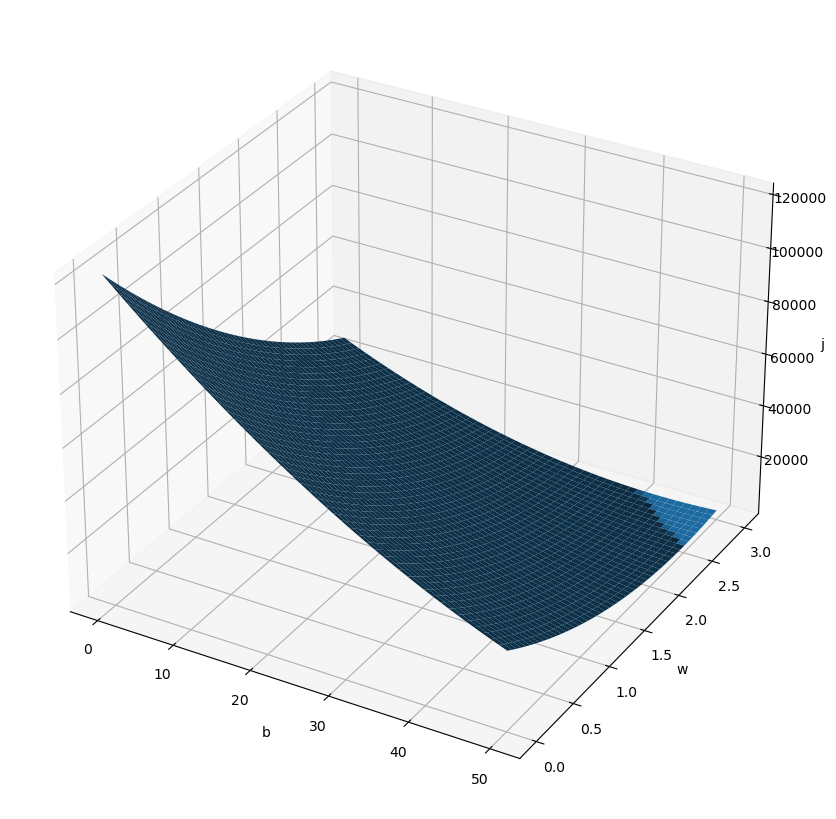

In [25]:
plt.figure(figsize=[8,8])
ax = plt.axes([0,0,1,1], projection='3d', 
             xlabel='b', ylabel='w', zlabel='j')

ax.plot_surface(mb, mw, sse)
plt.show()

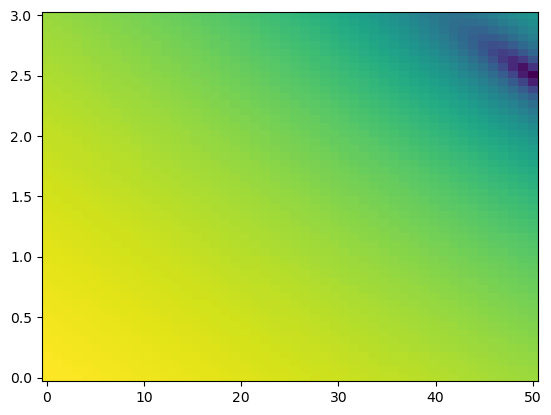

In [26]:
import matplotlib as mpl
plt.pcolormesh(mb, mw, sse, norm=mpl.colors.LogNorm())

In [46]:
eta = 0.001
n = 10000
w, b = 7, 90
h = 0

In [47]:
# wi = [7, 7.9, 8, 9.3]
wi = [w]
bi = [b]
wi

[7]

In [48]:
bi

[90]

In [53]:
h = w * days + b

In [57]:
10**(-4)

0.0001

In [50]:
for i in range(n):
    w += 2 * eta * ((kgs - h) * days).sum()
    b += 2 * eta * (kgs - h).sum()
    
    wi += [w]
    bi += [b]
    
    h = w * days +b

/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_9006/1494981221.py:2: RuntimeWarning: overflow encountered in multiply
  w += 2 * eta * ((kgs - h) * days).sum()
/var/folders/tq/1dn18qvs46z75s3216p47sbm0000gn/T/ipykernel_9006/1494981221.py:2: RuntimeWarning: invalid value encountered in double_scalars
  w += 2 * eta * ((kgs - h) * days).sum()


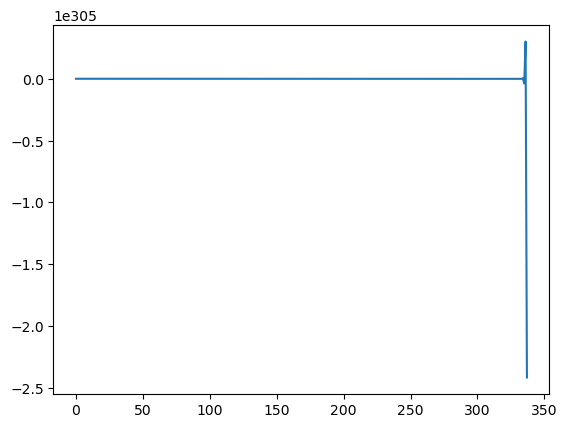

In [51]:
plt.plot(wi)

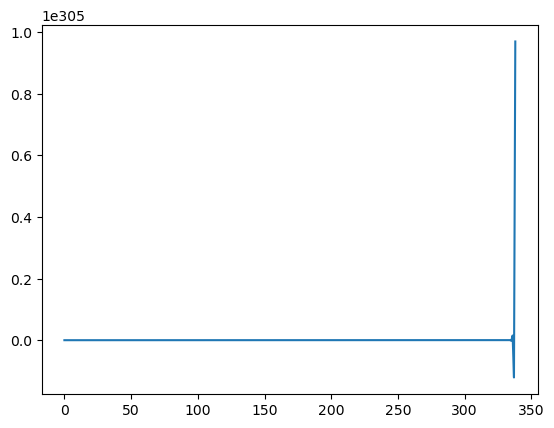

In [52]:
plt.plot(bi)

In [34]:
len(wi)

10001

In [35]:
w_best = wi[-1]
b_best = bi[-1]

In [36]:
w_best, b_best

(nan, nan)

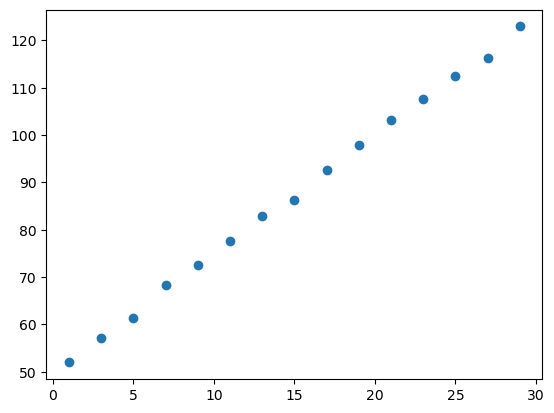

In [37]:
# h_from_predict = 

def get_best_h():
    return days * w_best + b_best

plt.plot(days, get_best_h())
plt.scatter(days, kgs)

In [38]:
get_best_h()

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [67]:
class ThotthoiChoengsen:
    def __init__(self,eta):
        self.eta = eta
    # เรียนรู้จากข้อมูล X และ z ที่ใส่เข้าไป
    def learn(self,X,z,d_yut=1e-7,n_thamsam=100000):
        self.w = np.zeros(X.shape[1]+1)
        dw = np.zeros(X.shape[1]+1)
        h = self.thamnai(X)
        self.sse = [self._ha_sse(h,z)] # ลิสต์บันทึกค่า SSE ในแต่ละรอบ
        for i in range(n_thamsam):
            eee = 2*(z-h)*self.eta
            dw[1:] = np.dot(eee,X)
            dw[0] = eee.sum()
            self.w += dw
            h = self.thamnai(X)
            self.sse += [self._ha_sse(h,z)]
            if(np.all(abs(dw)<d_yut)):
                break
    # ทำนายค่าจาก X ที่ใส่เข้าไป
    def thamnai(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    # หาค่าผลรวมความคลาดเคลื่อนกำลังสอง
    def _ha_sse(self,h,z):
        return ((h-z)**2).sum()

In [68]:
LinearRegModel = ThotthoiChoengsen

In [69]:
model = LinearRegModel(0.0001)

In [71]:
model.eta

0.0001

In [77]:
days

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

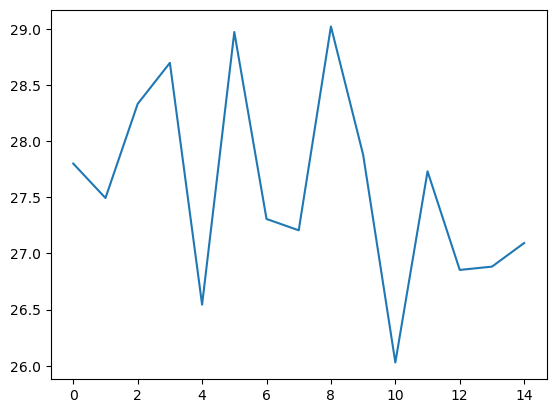

In [80]:
noise_2 = np.random.randn(len(days))
sun = 28 + noise_2
plt.plot(sun)

In [76]:
kgs

array([ 51.97869134,  57.18975647,  61.46831947,  68.32183496,
        72.66918084,  77.60341805,  82.917265  ,  86.19731498,
        92.53987921,  98.00058936, 103.25564021, 107.59369259,
       112.43331848, 116.19034989, 122.93450173])

In [85]:
# X = np.array([days, sun])

model.learn(X, kgs)

ValueError: operands could not be broadcast together with shapes (2,) (15,) 

In [86]:
phonlamai = np.random.uniform(0,10,100) # ปริมาณผลไม้
phak = np.random.uniform(0,10,100) # ปริมาณผัก
chomti = 10+phonlamai*2+phak*3+np.random.randn(100)*3 # คำนวณพลังโจมตี


In [88]:
X = np.stack([phonlamai, phak], 1)
model.learn(X, chomti)

In [90]:
# X_thamnai = [4,4]
X_thamnai = [[4,4],
             [5,5]
             ]
model.thamnai(X_thamnai)

array([29.87092456, 34.91865611])